# Laboratorio 2 – Ejercicio 1: Retardos de primer orden y sistemas lineales

### Objetivo del Ejercicio

- Comprender el comportamiento de un **sistema lineal con retardo de primer orden**.
- Visualizar cómo el **stock y la salida** evolucionan en el tiempo.
- Identificar los **puntos de equilibrio** antes y después de cambios en la entrada.

## Imports y funciones auxiliares


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Variables y parametros de la simulación

In [ ]:
dt = 1               # paso de tiempo (días)
t_final = 50         # duración de la simulación (días)
delay = 5            # retardo (días)
entrada_inicial = 10 # unidades/día
entrada_cambio = 20  # cambio de entrada (unidades/día)
dia_cambio = 25      # día del cambio

# Vectores de tiempo
tiempo = np.arange(0, t_final + dt, dt)

## Inicialización de variables

In [ ]:
stock = np.zeros_like(tiempo)
salida = np.zeros_like(tiempo)
entrada = np.zeros_like(tiempo)

entrada[:] = entrada_inicial
entrada[dia_cambio:] = entrada_cambio  # Cambio en el día 25

## Simulación usando intergración de Euler

In [ ]:
for t in range(1, len(tiempo)):
    salida[t] = stock[t-1] / delay
    d_stock = (entrada[t] - salida[t]) * dt
    stock[t] = stock[t-1] + d_stock

# Calcular salida final
salida[-1] = stock[-1] / delay

## Gráficas de resultados

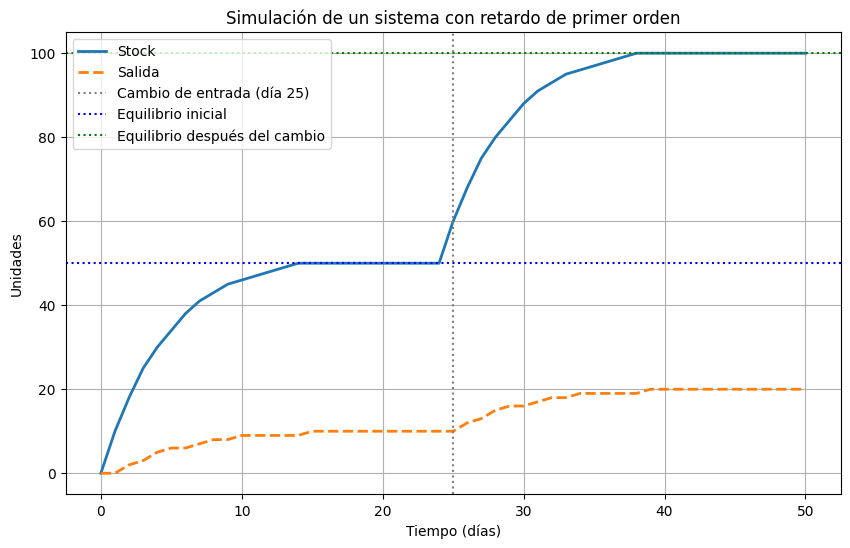

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tiempo, stock, label="Stock", linewidth=2)
plt.plot(tiempo, salida, label="Salida", linewidth=2, linestyle='--')
plt.axvline(dia_cambio, color='gray', linestyle=':', label='Cambio de entrada (día 25)')
plt.axhline(entrada_inicial * delay, color='blue', linestyle=':', label='Equilibrio inicial')
plt.axhline(entrada_cambio * delay, color='green', linestyle=':', label='Equilibrio después del cambio')

plt.title("Simulación de un sistema con retardo de primer orden")
plt.xlabel("Tiempo (días)")
plt.ylabel("Unidades")
plt.legend()
plt.grid()
plt.show()